In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
import kagglehub
import os

path = kagglehub.dataset_download("rabieelkharoua/alzheimers-disease-dataset")

/home/mikol/.cache/pypoetry/virtualenvs/alzheimer-s-disease-prediction-bkhXyH_L-py3.11/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
files = os.listdir(path)
print("Content of", files)

csv_file = files[0]
csv_path = os.path.join(path, csv_file)

# Load DataFrame
df = pd.read_csv(csv_path)
df = df.drop(columns=["DoctorInCharge"])  # Drop useless column


# Display the content of DataFrame
# df.head().T

Content of ['alzheimers_disease_data.csv']


<!-- @format -->

# First evaluation


In [4]:
from sklearn.model_selection import train_test_split
from functions.data_prep import data_preprocessing

X = np.array(df.drop(columns=["Diagnosis"]))
y = np.array(df["Diagnosis"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train_scaled, X_test_scaled = data_preprocessing(X_train, X_test)

<!-- @format -->

## Logisitc Regression


[I 2025-01-28 09:18:18,984] A new study created in memory with name: no-name-8abe9c66-01de-44ec-9ca7-fd2a47214d1f
[I 2025-01-28 09:18:19,048] Trial 0 finished with value: 0.7329494648421624 and parameters: {'solver': 'saga', 'penalty': 'l1', 'C': 0.18818090600577234}. Best is trial 0 with value: 0.7329494648421624.
[I 2025-01-28 09:18:19,113] Trial 1 finished with value: 0.7362552499661292 and parameters: {'solver': 'saga', 'penalty': 'l1', 'C': 21.597632663699276}. Best is trial 1 with value: 0.7362552499661292.
[I 2025-01-28 09:18:19,131] Trial 2 finished with value: 0.6818859233166238 and parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.014880995786243432}. Best is trial 1 with value: 0.7362552499661292.
[I 2025-01-28 09:18:19,178] Trial 3 finished with value: 0.6785801381926568 and parameters: {'solver': 'sag', 'penalty': 'l2', 'C': 0.013830279005214198}. Best is trial 1 with value: 0.7362552499661292.
[I 2025-01-28 09:18:19,267] Trial 4 finished with value: 0.73625524996612

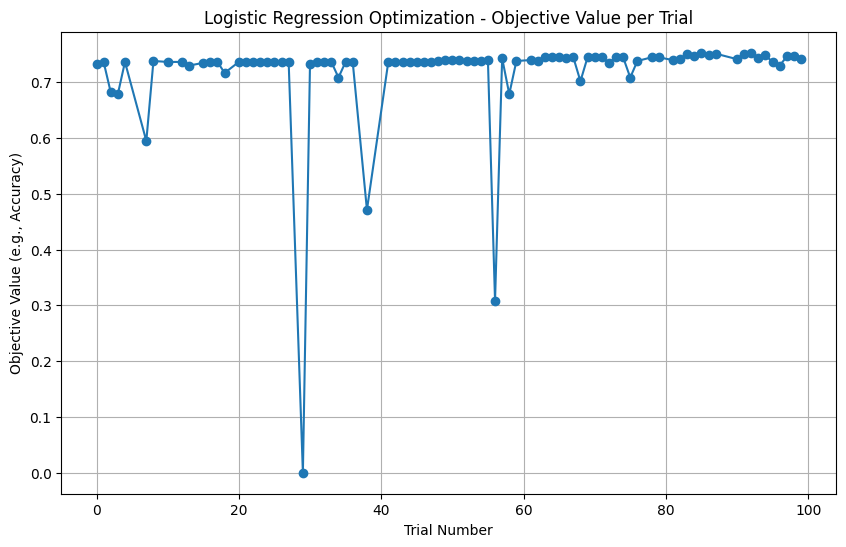

Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.05144029188931723}
Best Value: 0.7527570789865873


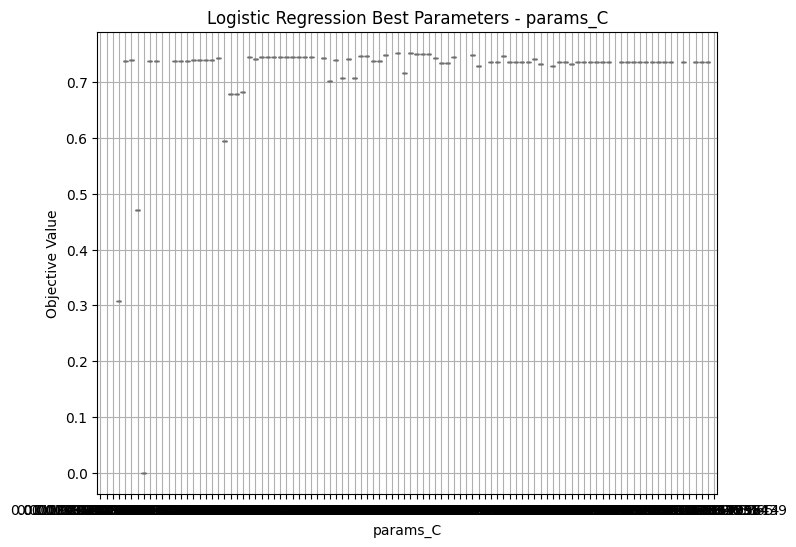

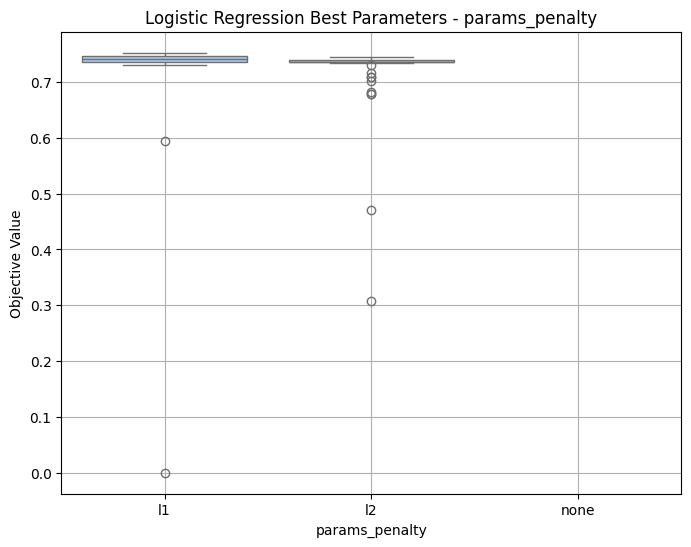

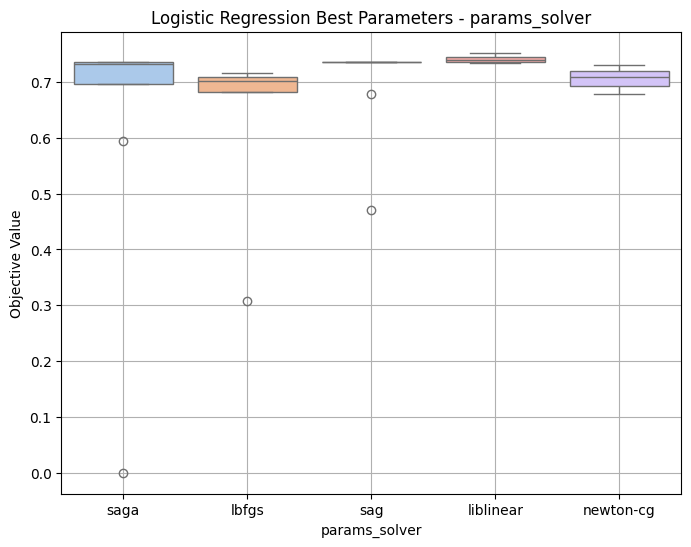

In [5]:
from models.logistic_regression import Logistic_Regression_

clf = Logistic_Regression_()
study_logistic = clf.bayesian_opt(X_train_scaled, y_train)

# Wizualizujesz wyniki
clf.visualize_results(study_logistic)

<!-- @format -->

### Saving and evaluating log reg


In [ ]:
from functions.save_load_model import save_model, load_model

# save_model(study_logistic, "study_logistic")

Model has been saved as models/trained/study_logistic.joblib


In [7]:
loaded_study = load_model("study_logistic")
best_params = loaded_study.best_params
print("Najlepsze parametry:", best_params)

Najlepsze parametry: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.05144029188931723}


In [8]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(**best_params)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(C=0.05144029188931723, penalty='l1', solver='liblinear')

In [9]:
from sklearn.metrics import classification_report

y_predicted = log_reg.predict(X_test_scaled)

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.90      0.87       277
           1       0.79      0.73      0.76       153

    accuracy                           0.83       430
   macro avg       0.82      0.81      0.82       430
weighted avg       0.83      0.83      0.83       430



<!-- @format -->


<!-- @format -->

## Suppor Vector Machines


[I 2025-01-28 09:23:10,308] A new study created in memory with name: no-name-90722fa6-73f4-4424-abb9-1ee821330fc7
[I 2025-01-28 09:23:10,636] Trial 0 finished with value: 0.0 and parameters: {'C': 0.0019860497134901677, 'gamma': 'auto', 'kernel': 'sigmoid', 'degree': 3, 'coef0': 0.8572076763871729}. Best is trial 0 with value: 0.0.
[I 2025-01-28 09:23:10,756] Trial 1 finished with value: 0.7363094431648828 and parameters: {'C': 0.027669610494030474, 'gamma': 'auto', 'kernel': 'linear', 'degree': 5, 'coef0': 0.719228481831691}. Best is trial 1 with value: 0.7363094431648828.
[I 2025-01-28 09:23:11,015] Trial 2 finished with value: 0.0 and parameters: {'C': 0.0021679409015526487, 'gamma': 'scale', 'kernel': 'rbf', 'degree': 3, 'coef0': 0.5450635987221842}. Best is trial 1 with value: 0.7363094431648828.
[I 2025-01-28 09:23:11,136] Trial 3 finished with value: 0.7362958948651944 and parameters: {'C': 0.02174032132286057, 'gamma': 'scale', 'kernel': 'linear', 'degree': 3, 'coef0': 0.378964

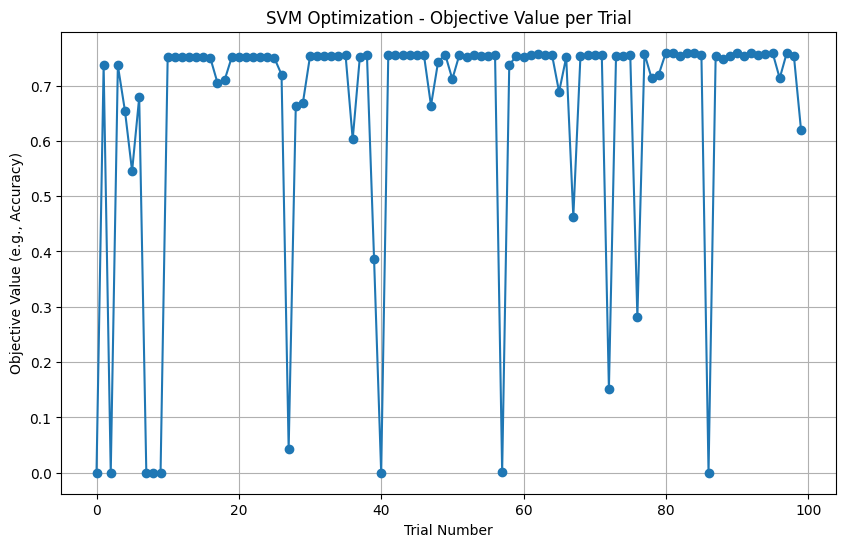

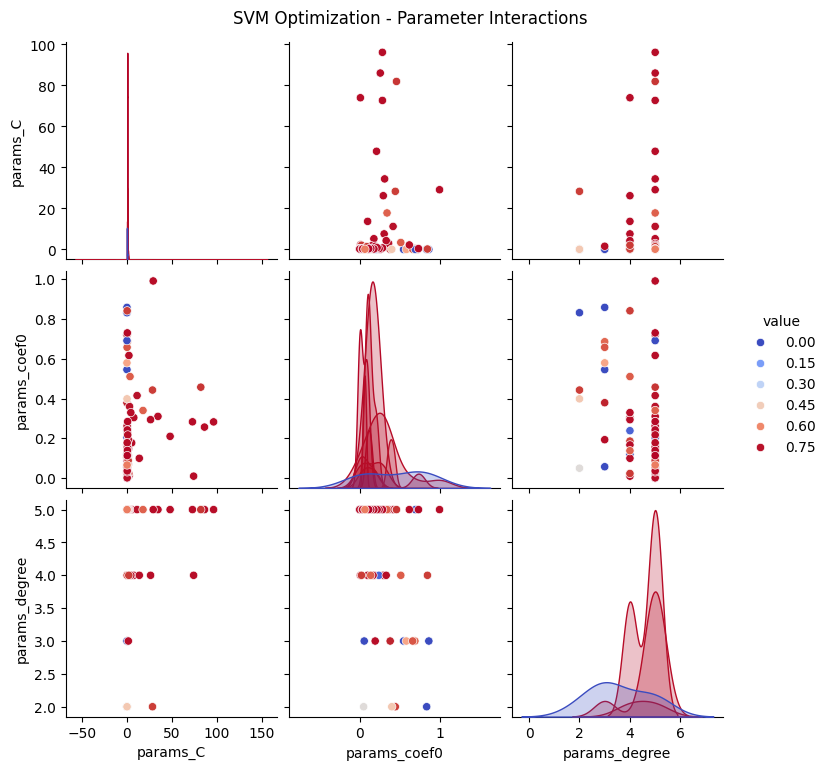

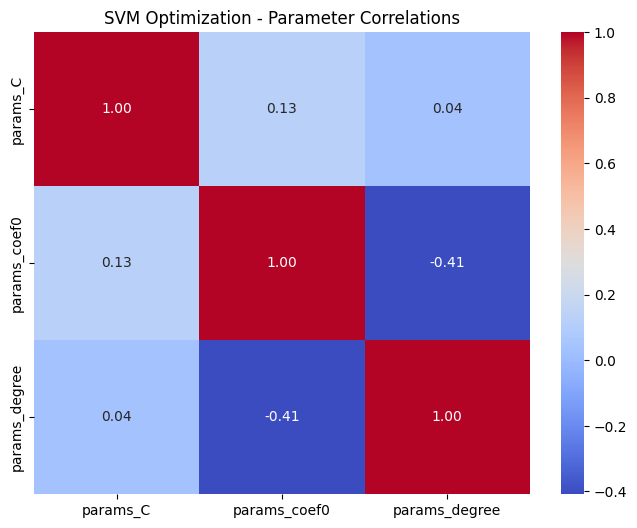

Best Parameters: {'C': 0.3390997178730789, 'gamma': 'scale', 'kernel': 'linear', 'degree': 5, 'coef0': 0.0013626108983908203}
Best Value: 0.7593144560357675


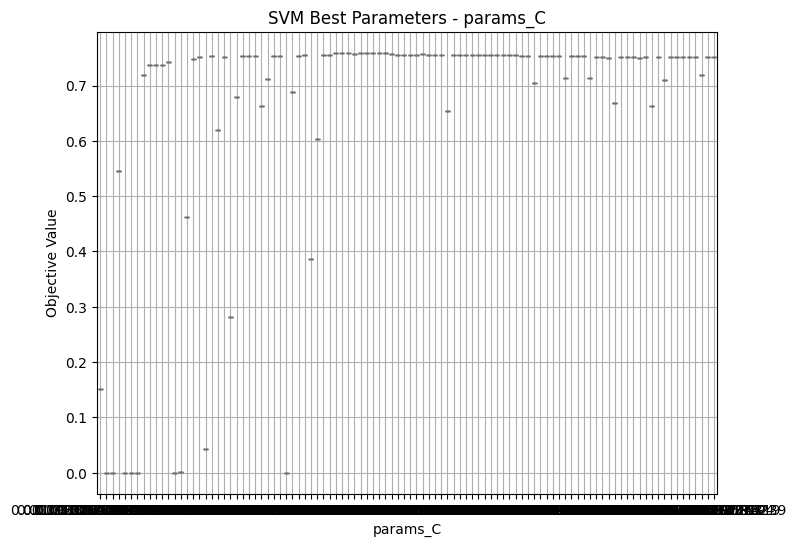

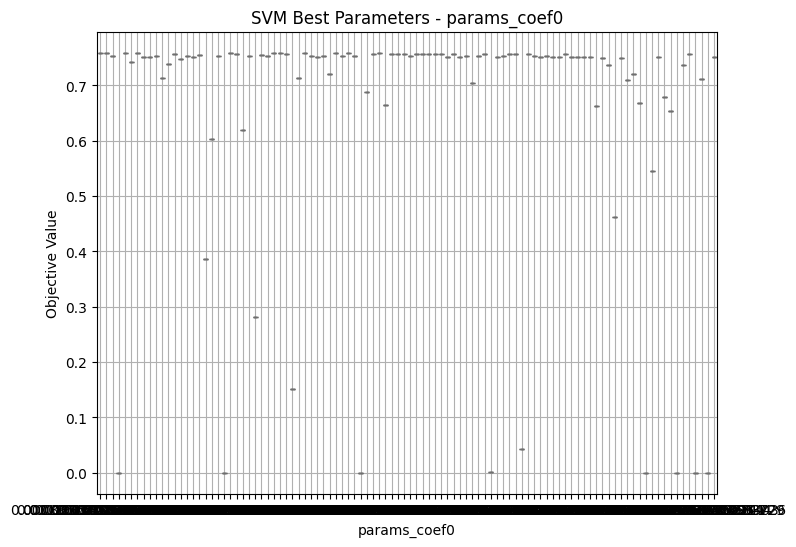

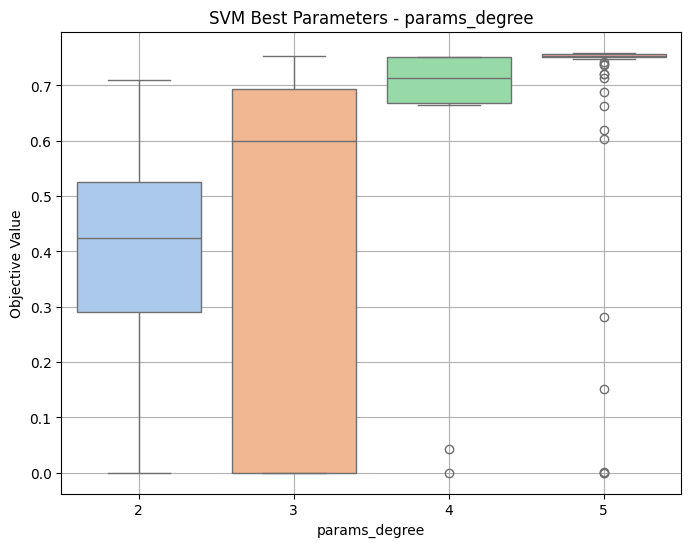

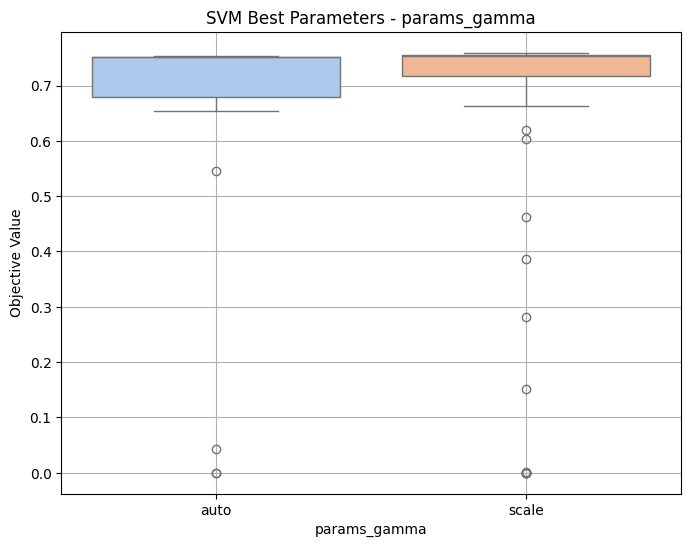

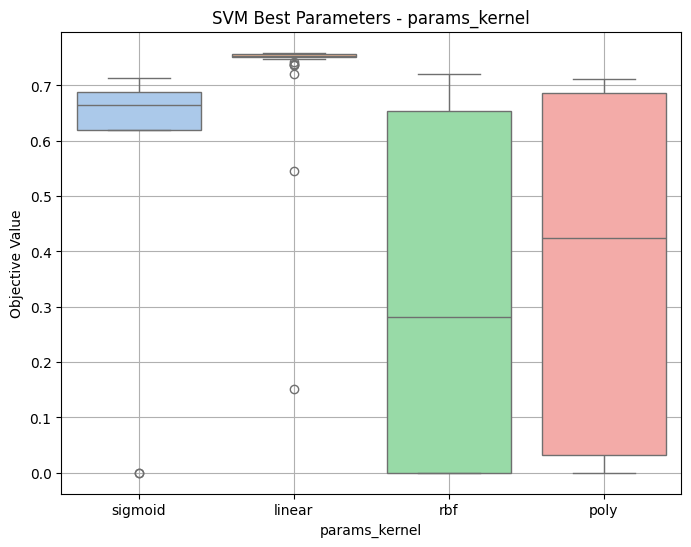

In [5]:
from models.svm import SVM

# Tworzymy instancję modelu SVM
clf = SVM()

# Optymalizujemy model za pomocą Optuna
study_svm = clf.bayesian_opt(X_train_scaled, y_train)

# Wizualizujemy wyniki
clf.visualize_results(study_svm)

<!-- @format -->

### Saving and evaluating svm


In [ ]:
from functions.save_load_model import save_model, load_model

# save_model(study_svm, "study_svm")

Model has been saved as models/trained/study_svm.joblib


In [7]:
loaded_svm_study = load_model("study_svm")
best_params = loaded_svm_study.best_params
print("Najlepsze parametry:", best_params)

Najlepsze parametry: {'C': 0.3390997178730789, 'gamma': 'scale', 'kernel': 'linear', 'degree': 5, 'coef0': 0.0013626108983908203}


In [8]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm_clf = SVC(**best_params)
svm_clf.fit(X_train_scaled, y_train)

y_predicted = svm_clf.predict(X_test_scaled)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       277
           1       0.77      0.70      0.73       153

    accuracy                           0.82       430
   macro avg       0.81      0.79      0.80       430
weighted avg       0.82      0.82      0.82       430



<!-- @format -->

## XGBoost


[I 2025-01-28 09:58:56,058] A new study created in memory with name: no-name-9816b1d5-8089-40dc-bb89-a5ed580626f7
[I 2025-01-28 09:58:57,766] Trial 0 finished with value: 0.9126794452844299 and parameters: {'max_depth': 4, 'learning_rate': 0.09952856808325104, 'n_estimators': 623, 'subsample': 0.9911856305867768, 'colsample_bytree': 0.7820320786477892, 'gamma': 0.004199567566839873, 'lambda': 5.627500115998086e-05, 'alpha': 1.7911650422097665, 'min_child_weight': 6}. Best is trial 0 with value: 0.9126794452844299.
[I 2025-01-28 09:58:58,959] Trial 1 finished with value: 0.9192801053504365 and parameters: {'max_depth': 3, 'learning_rate': 0.075889409655615, 'n_estimators': 427, 'subsample': 0.8278986238625847, 'colsample_bytree': 0.7258652160450854, 'gamma': 0.001853458029818717, 'lambda': 0.8649749003870635, 'alpha': 4.3748764364695365e-06, 'min_child_weight': 5}. Best is trial 1 with value: 0.9192801053504365.
[I 2025-01-28 09:59:01,059] Trial 2 finished with value: 0.9093953730348404

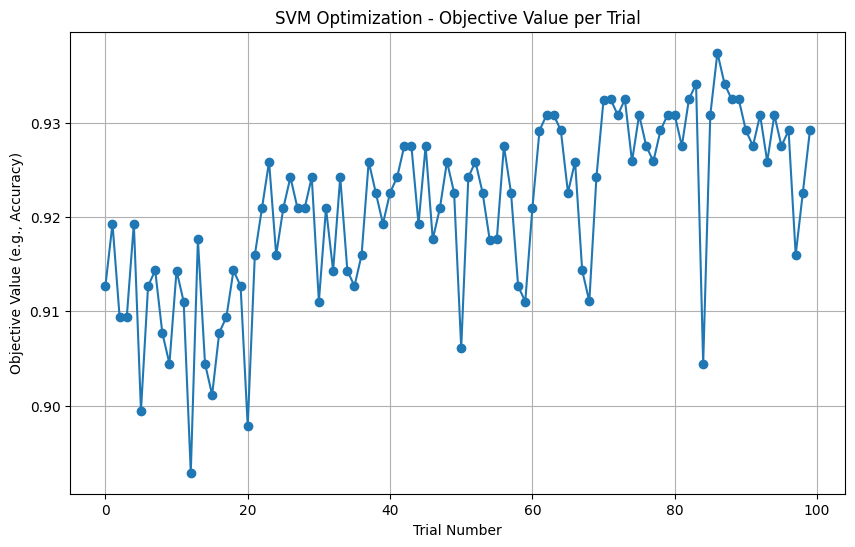

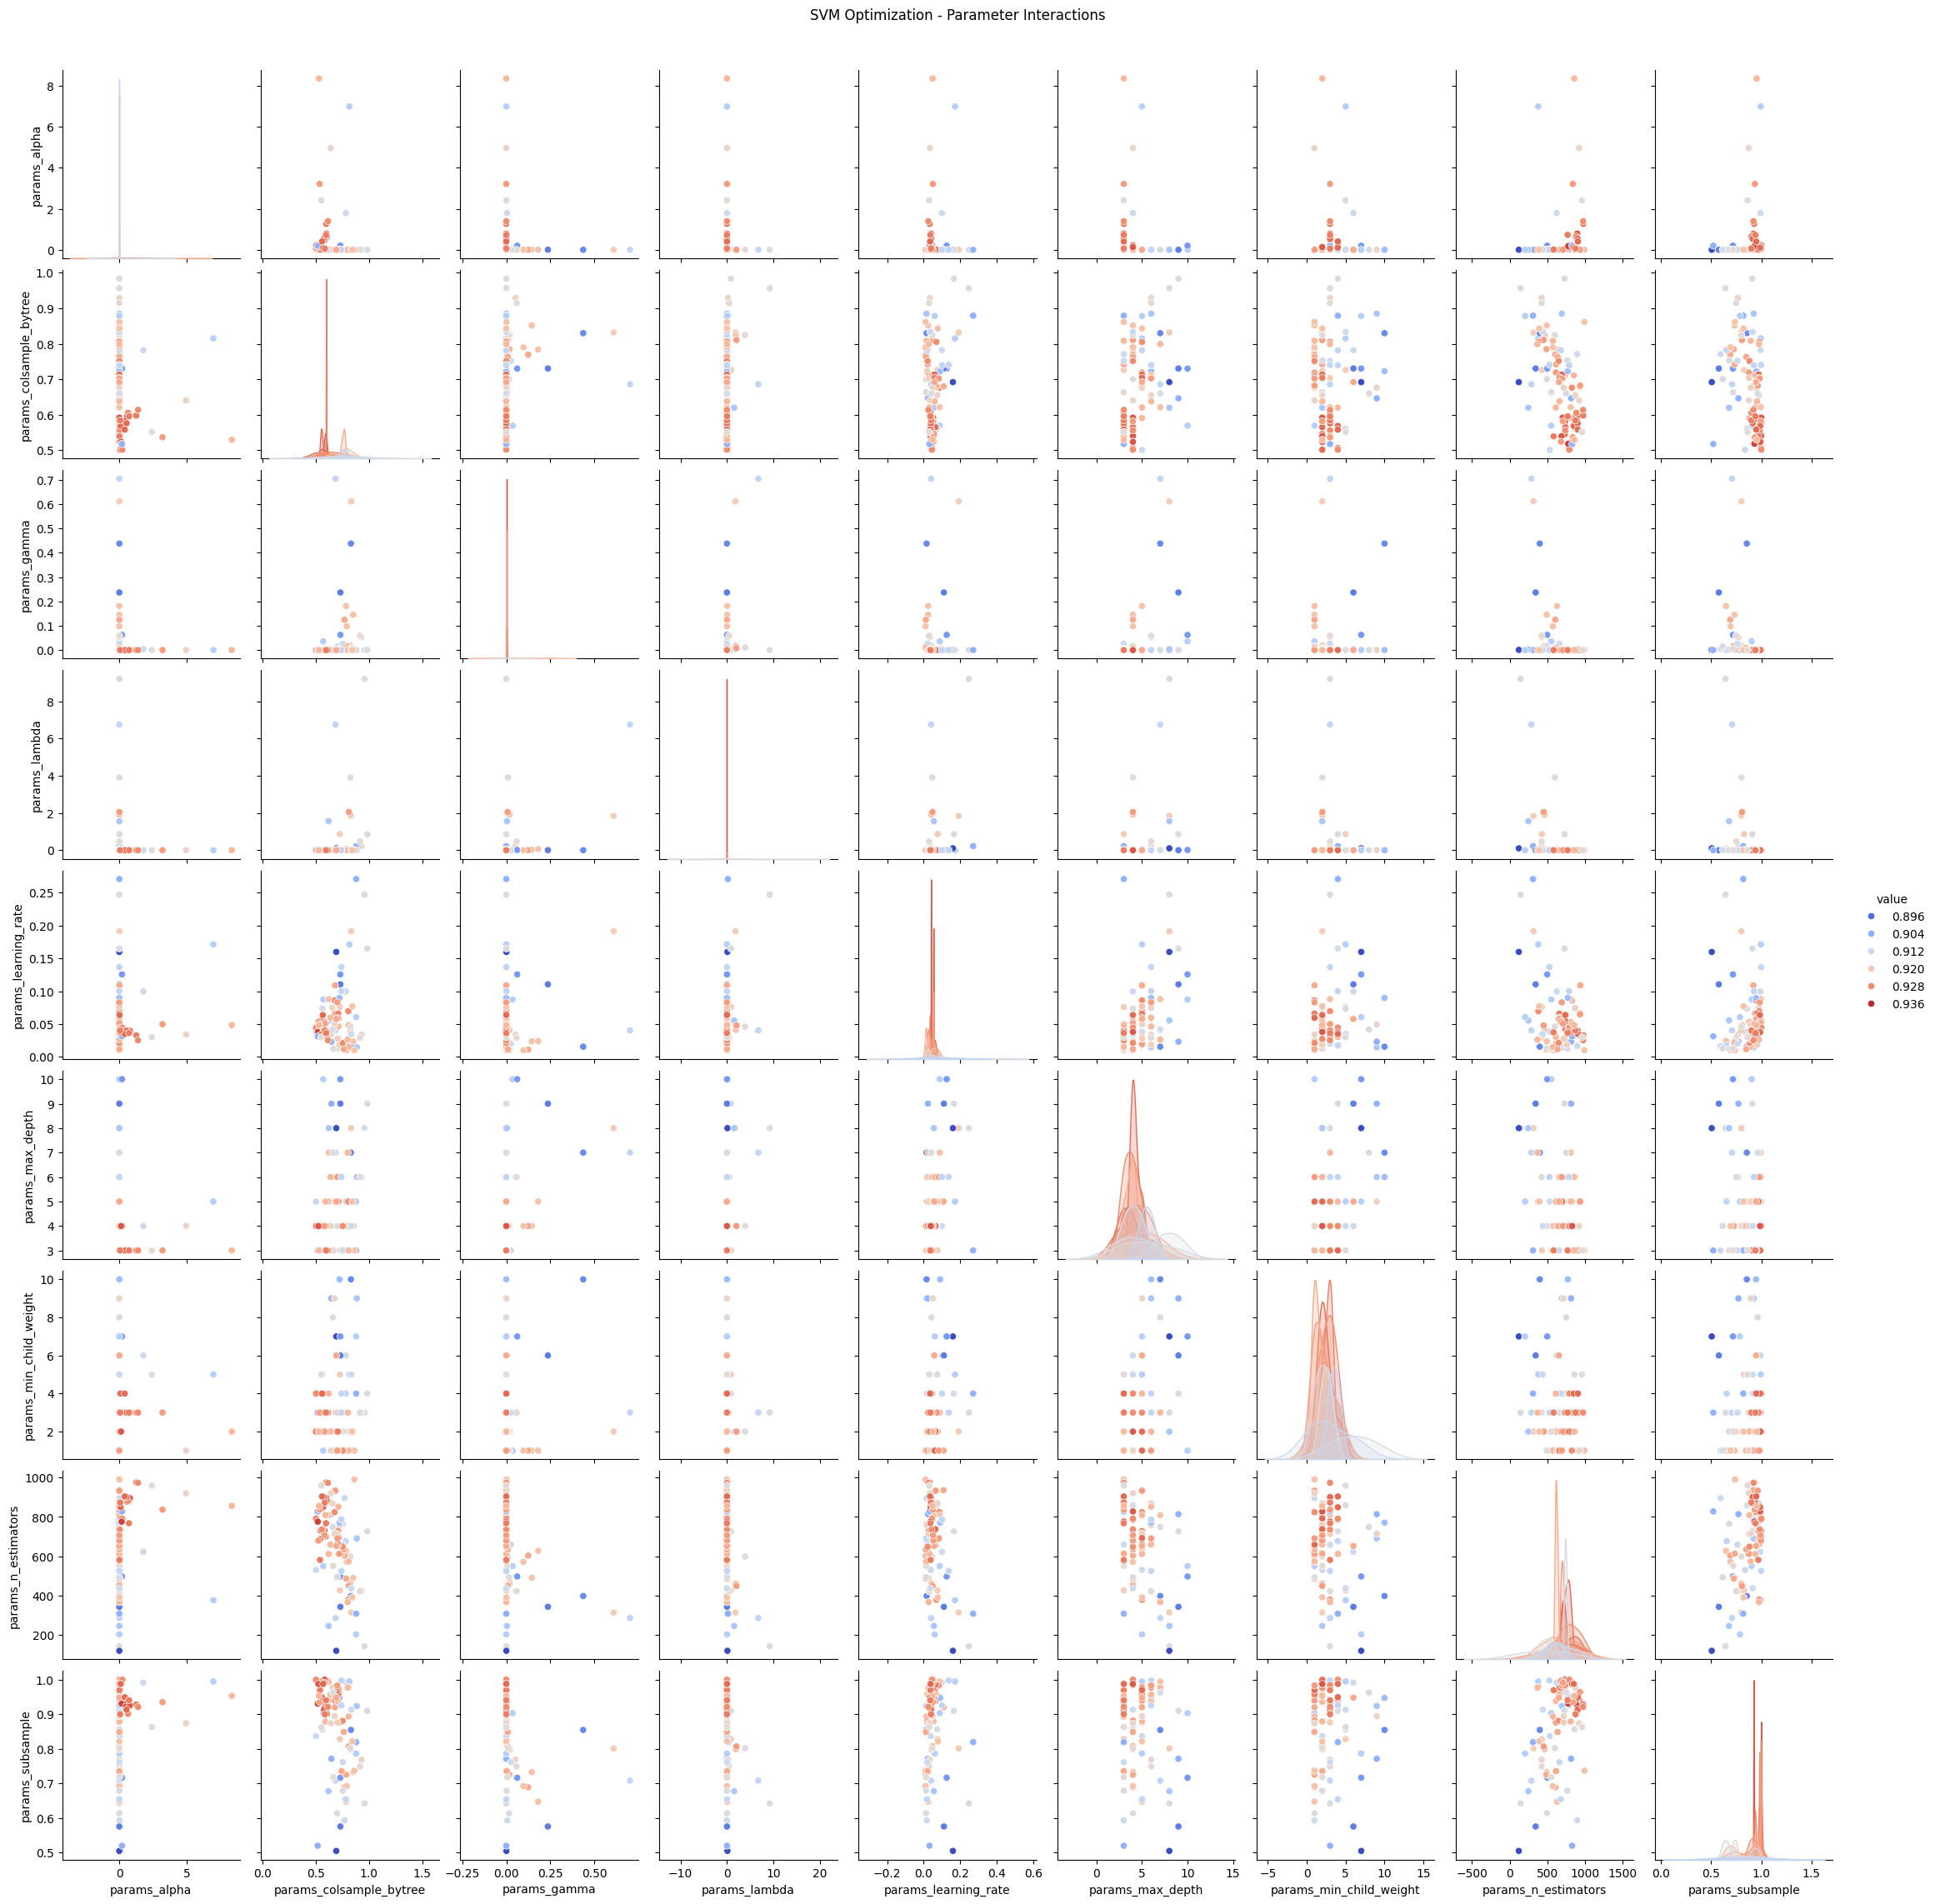

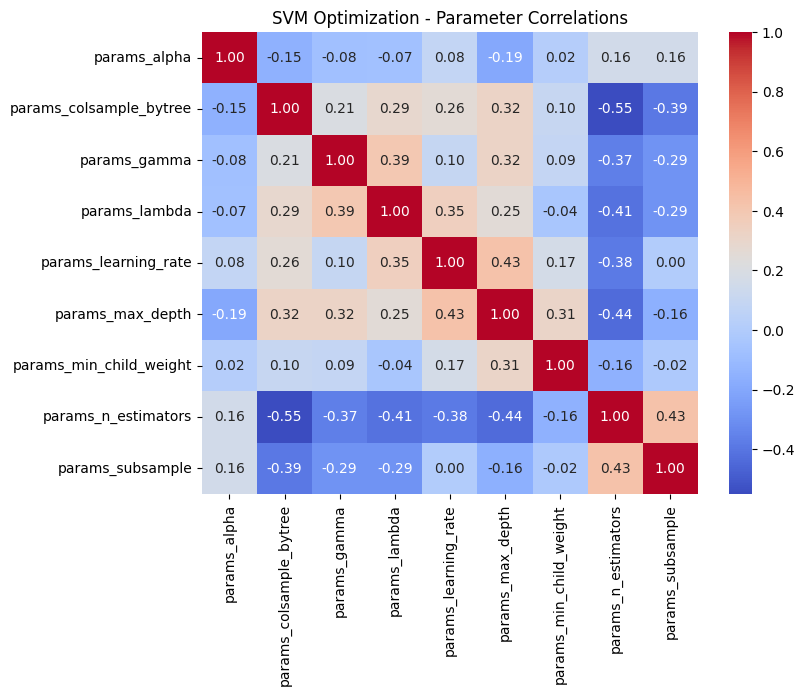

Best Parameters: {'max_depth': 3, 'learning_rate': 0.0401367268599909, 'n_estimators': 881, 'subsample': 0.9382653090380897, 'colsample_bytree': 0.5954837268990366, 'gamma': 1.1686409567580642e-08, 'lambda': 8.153358519523905e-07, 'alpha': 0.6932142418387729, 'min_child_weight': 3}
Best Value: 0.9374075338568338


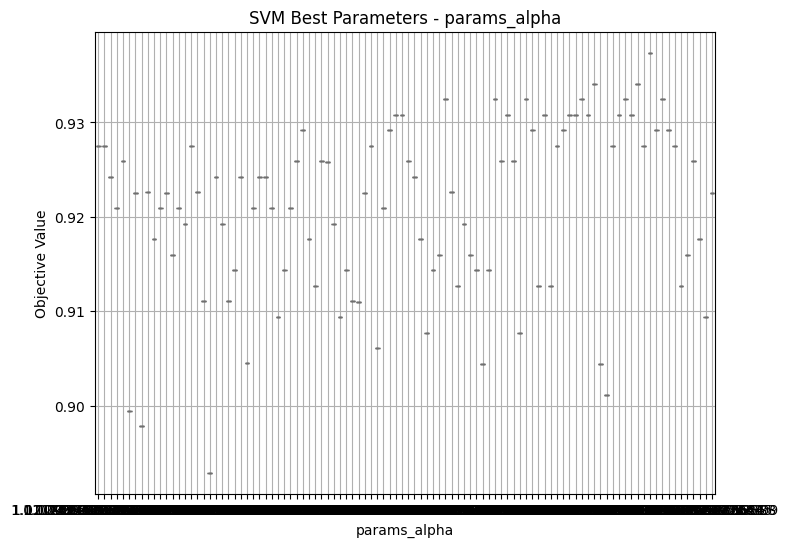

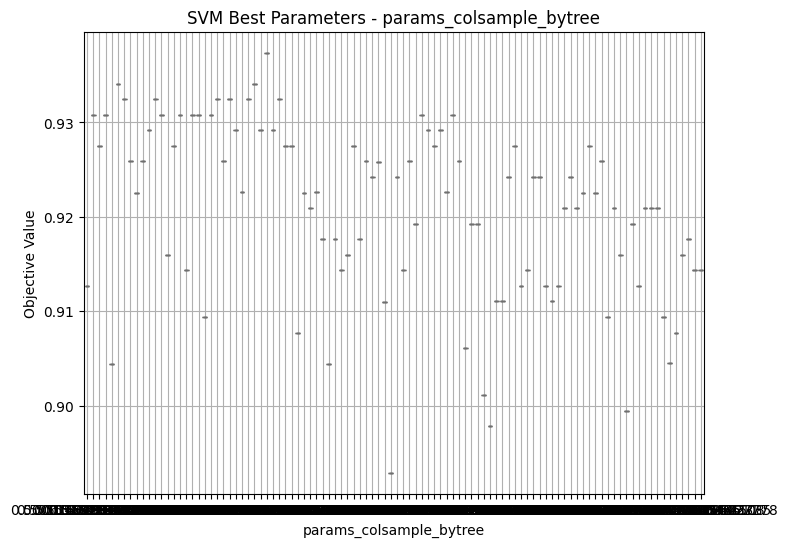

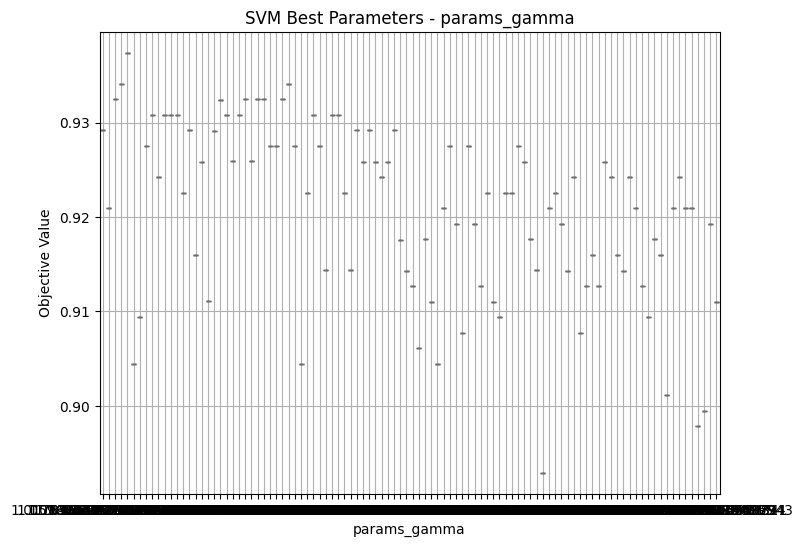

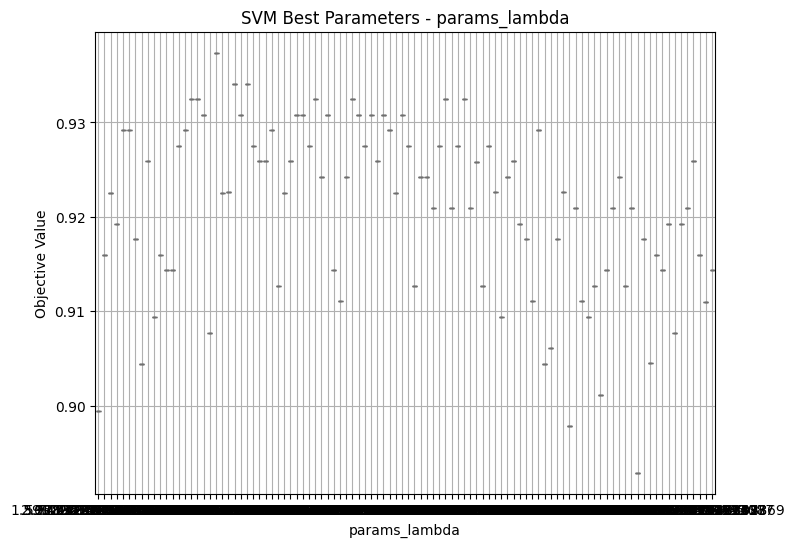

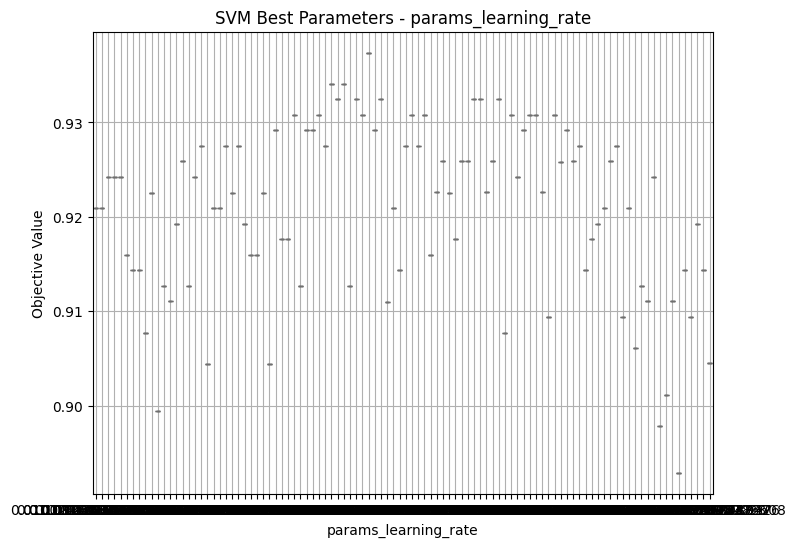

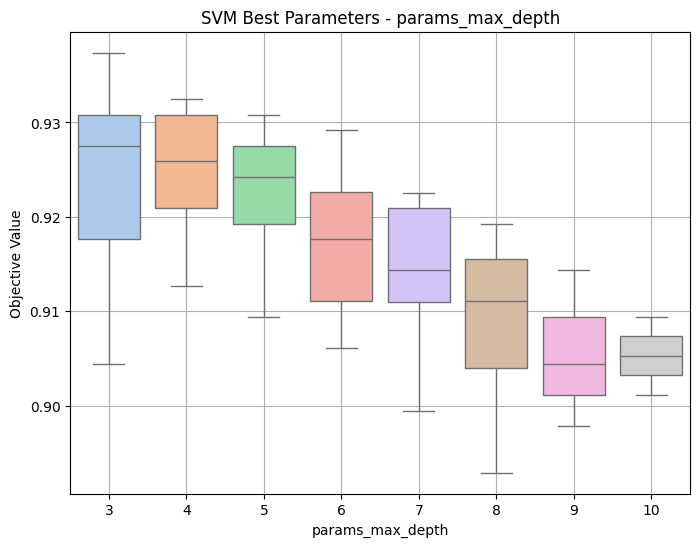

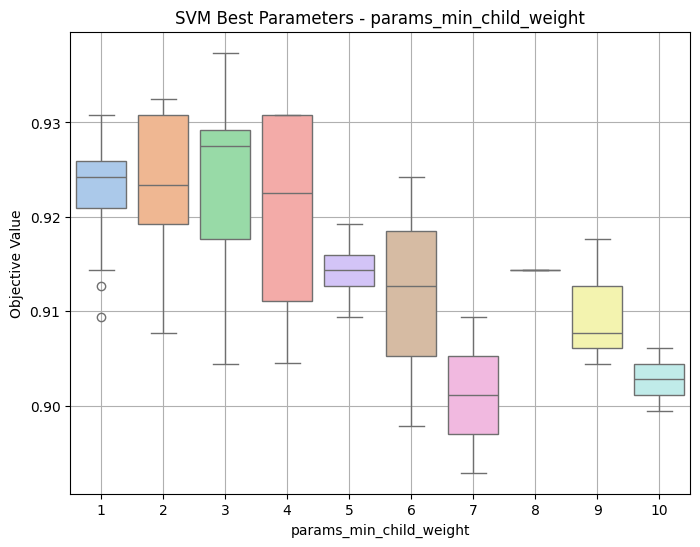

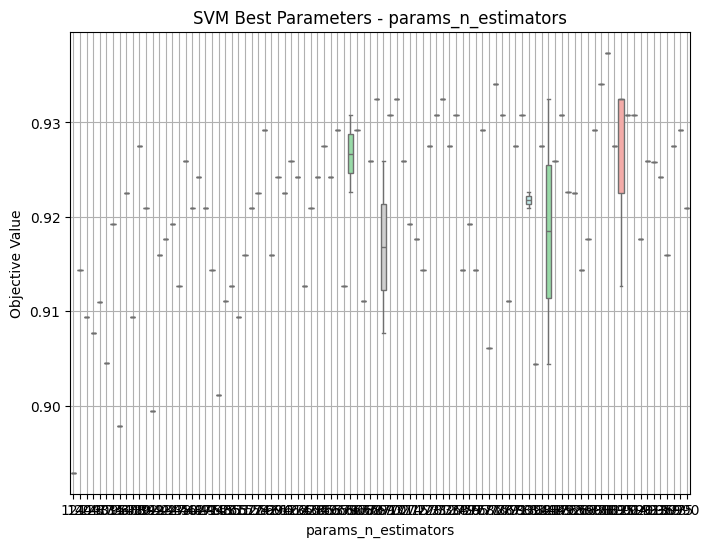

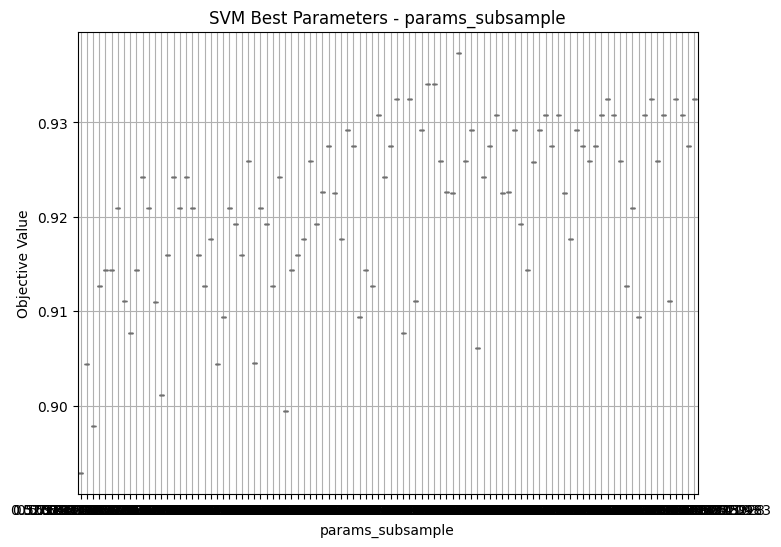

In [7]:
from models.xgboost import XGBoost

xgboost_model = XGBoost()

study_XGB = xgboost_model.bayesian_opt(X_train_scaled, y_train)
xgboost_model.visualize_results(study_XGB)

In [8]:
from functions.save_load_model import save_model, load_model

# save_model(study_XGB, "study_XGB")

Model has been saved as models/trained/study_XGB.joblib


In [10]:
loaded_xgb_study = load_model("study_XGB")
best_params = loaded_xgb_study.best_params
print("Najlepsze parametry:", best_params)

Najlepsze parametry: {'max_depth': 3, 'learning_rate': 0.0401367268599909, 'n_estimators': 881, 'subsample': 0.9382653090380897, 'colsample_bytree': 0.5954837268990366, 'gamma': 1.1686409567580642e-08, 'lambda': 8.153358519523905e-07, 'alpha': 0.6932142418387729, 'min_child_weight': 3}


In [13]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report

xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train_scaled, y_train)

y_predicted = xgb_clf.predict(X_test_scaled)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       277
           1       0.94      0.93      0.94       153

    accuracy                           0.96       430
   macro avg       0.95      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430



<!-- @format -->

## Random Forest


In [5]:
from models.random_forest import Random_Forest_

# Tworzymy instancję modelu Random Forest
rf_model = Random_Forest_()

# Optymalizujemy model za pomocą Optuna
study_rf = rf_model.bayesian_opt(X_train_scaled, y_train)

[I 2025-01-28 10:12:38,437] A new study created in memory with name: no-name-4baca115-5e6b-4e4a-a9c3-a1e0c9b9c31b
[I 2025-01-28 10:12:38,979] Trial 0 finished with value: 0.9138975523764324 and parameters: {'n_estimators': 67, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9138975523764324.
[I 2025-01-28 10:12:43,266] Trial 1 finished with value: 0.9418146993016476 and parameters: {'n_estimators': 500, 'max_depth': 7, 'min_samples_split': 18, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 1 with value: 0.9418146993016476.
[I 2025-01-28 10:12:44,933] Trial 2 finished with value: 0.8964421316699436 and parameters: {'n_estimators': 228, 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 15, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.9418146993016476.
[I 2025-01-28 10:12:47,383] Trial 3 finished with value: 0.944145365787511 and parameters: {'n_estimators': 277, 'max_depth': 15, 'min_s

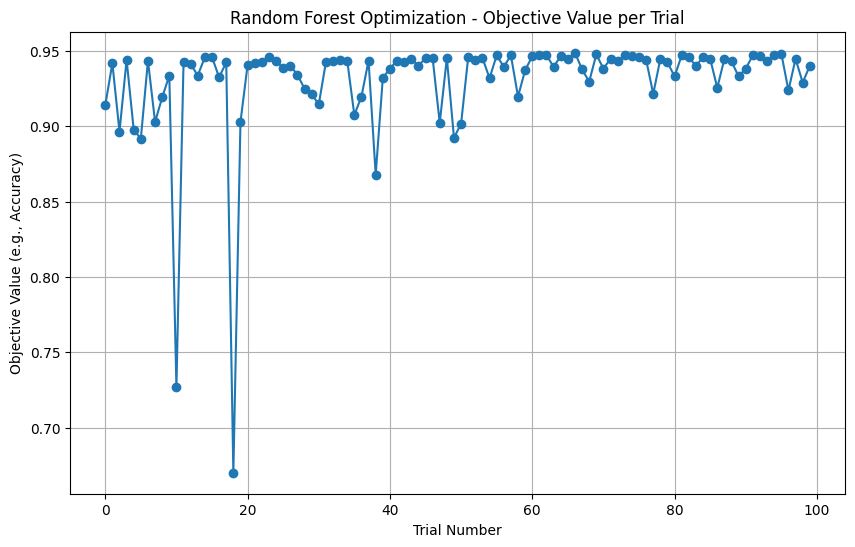

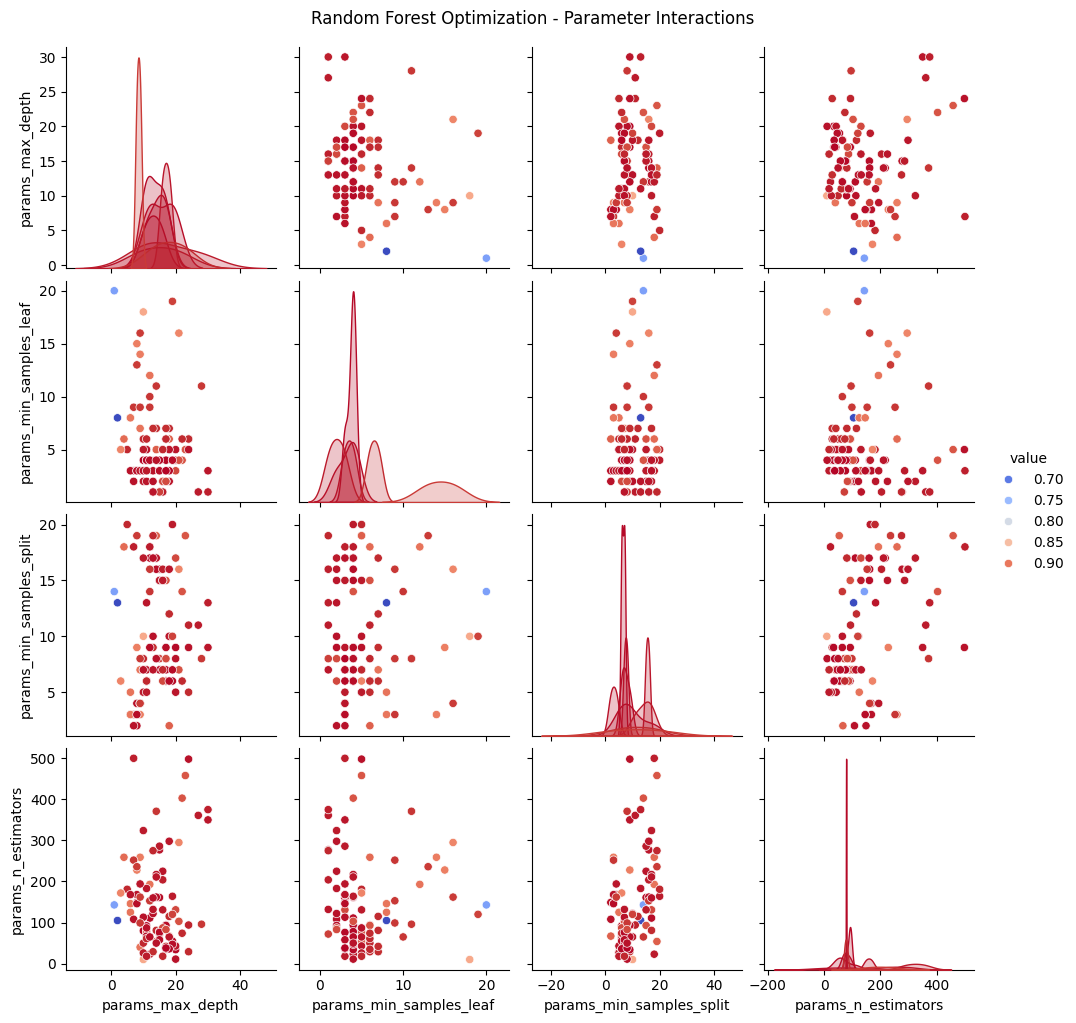

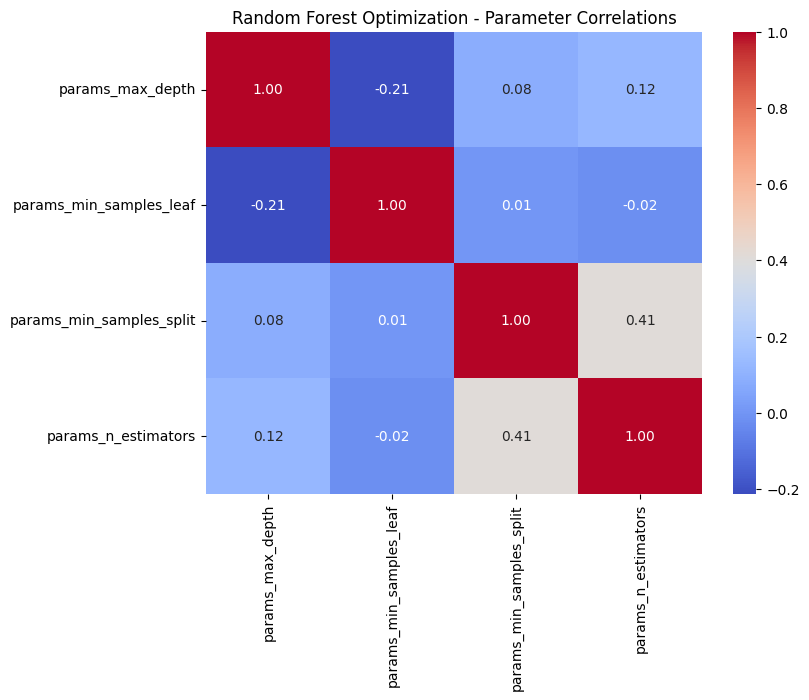

Best Parameters: {'n_estimators': 40, 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': None}
Best Value: 0.9487931385178656


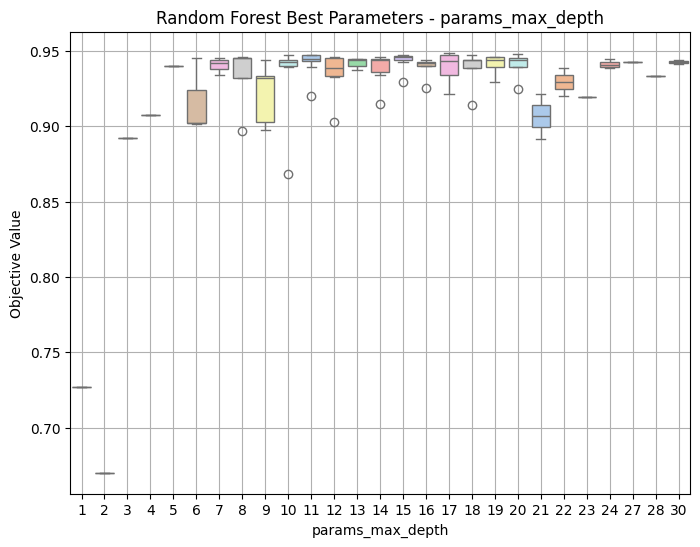

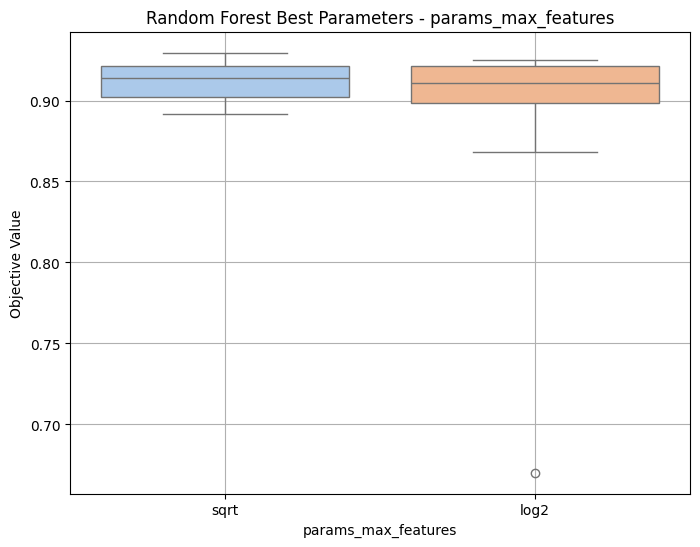

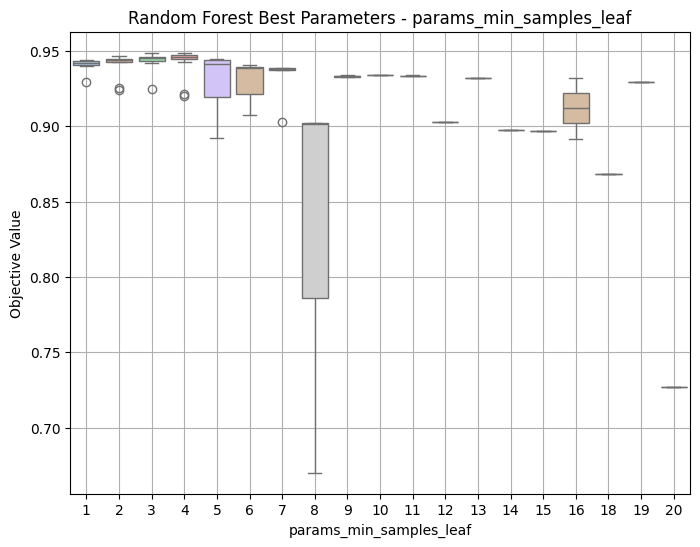

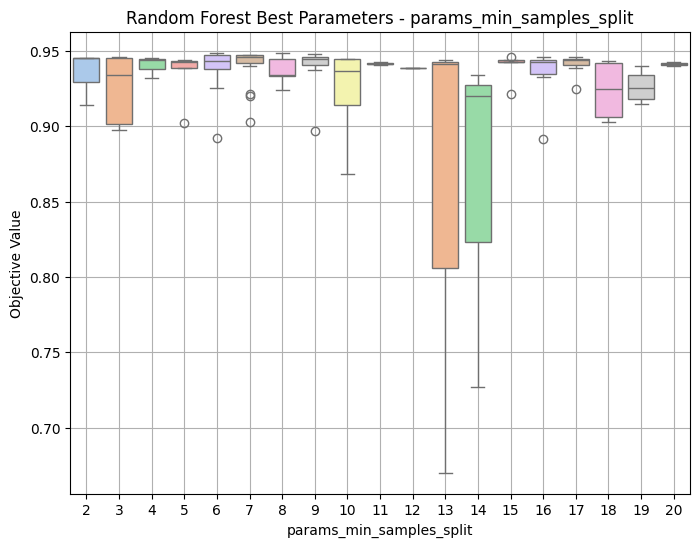

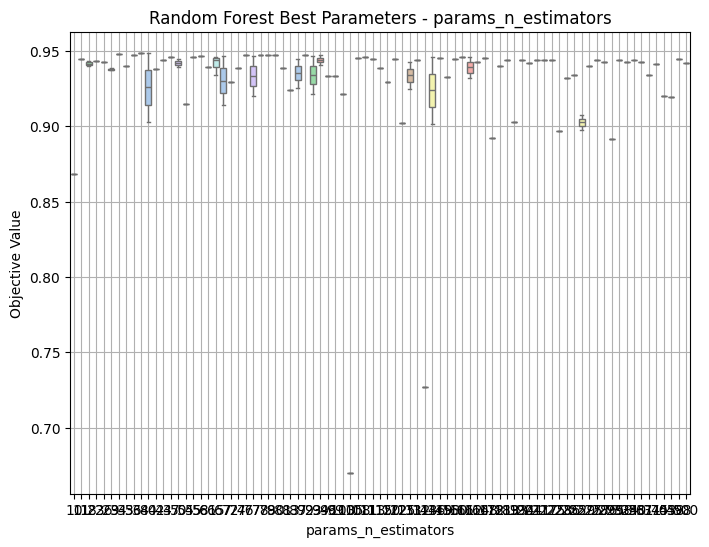

In [6]:
rf_model.visualize_results(study_rf)

In [7]:
from functions.save_load_model import save_model, load_model

save_model(study_rf, "study_rf")

Model has been saved as models/trained/study_rf.joblib


In [8]:
loaded_rf_study = load_model("study_rf")
best_params = loaded_rf_study.best_params
print("Najlepsze parametry:", best_params)

Najlepsze parametry: {'n_estimators': 40, 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': None}


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train_scaled, y_train)

y_predicted = rf_clf.predict(X_test_scaled)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       277
           1       0.94      0.95      0.94       153

    accuracy                           0.96       430
   macro avg       0.96      0.96      0.96       430
weighted avg       0.96      0.96      0.96       430

